In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
    
    def Initialise(self,x_start,t_start):
        
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*f(self.x,self.t)
            self.x=self.x+dt*f(x_mp,self.t+dt/2)
            
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=f(self.x,self.t)
            k2=f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T


In [3]:
def f(x,t):     ## Definition of the function. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=1.1   
    y=alpha*x
    
    return y


NM=Numerical_methods(f)    ## Object definition

##Initial conditions
x_start=1     
t_start=0.


NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

dt=0.1                             ## Value of dt
N_iter=int(10/dt)                  ## Number of iteration. We define the numbger of iteration as a function of dt so that we  
                                   ## easily change dt and simulate the system for the same time. Imagine, if we use 
                                   ## N_iter=100 with dt=0.1 s  we are simulating the systems for 10 seconds, while if we
                                   ## N_iter=100 with dt=0.01 we are simulating the system for 1 second. To avoid this, we 
                                   ## define first the number of steps in a unit like seconds, and then we divide by the dt used.
    
    
X_euler,ts=NM.Euler(dt,N_iter)     ## Perform Euler 

NM.Initialise(x_start,t_start)     ## We need to reset the inital conditions before computing another simulation
X_mp,ts=NM.MidPoint(dt,N_iter)  ## Perform Midpoint method


NM.Initialise(x_start,t_start)              ## Initial condition again
X_RungeKutta2,ts=NM.RungeKutta2(dt,N_iter)  ## Perform Runge Kutta 2




In [4]:
## Definition of the function

def f(x,t):
    
    alpha=0.5
    y=-alpha*x+10*np.cos(20*t)*np.exp(-t)
    return y


In [5]:
## Definition of the function

def f(x,t):
    
    alpha=0.5
    omega=5
    y= -alpha*x + np.tanh( np.cos(omega*t) / (1+t) )
    return y


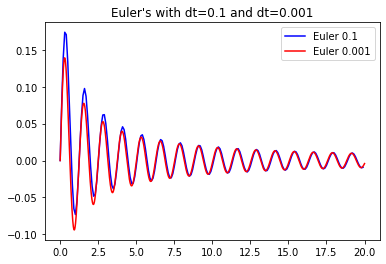

In [6]:
## Response to point 2

## We proceed as above, simulating the different methods

NM=Numerical_methods(f)

x_start=0
t_start=0.
NM.Initialise(x_start,t_start)

dt=0.1
N_iter=int(20/dt)
X_euler,ts=NM.Euler(dt,N_iter)



NM.Initialise(x_start,t_start)

dt=0.001
N_iter=int(20/dt)
X_euler2,ts2=NM.Euler(dt,N_iter)



## Plot of the solutions

fig, ax = plt.subplots(figsize=(6, 4))

p1,=plt.plot(ts,X_euler,color='blue')

p2,=plt.plot(ts2,X_euler2,color='red')


plt.legend([p1,p2],['Euler 0.1','Euler 0.001'])
plt.title("Euler's with dt=0.1 and dt=0.001")
plt.show();

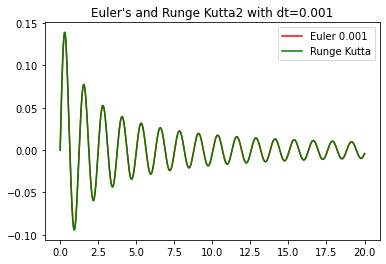

In [7]:
NM=Numerical_methods(f)

x_start=0
t_start=0.
NM.Initialise(x_start,t_start)

dt=0.001
N_iter=int(20/dt)
X_euler,ts=NM.Euler(dt,N_iter)


dt=0.001
N_iter=int(20/dt)
NM.Initialise(x_start,t_start)
X_RungeKutta2,ts=NM.RungeKutta2(dt,N_iter)

## Plot of the solutions

fig, ax = plt.subplots(figsize=(6, 4))

p1,=plt.plot(ts,X_euler,color='red')

p2,=plt.plot(ts,X_RungeKutta2,color='green')

plt.legend([p1,p2],['Euler 0.001', 'Runge Kutta'])
plt.title("Euler's and Runge Kutta2 with dt=0.001")
plt.show();

# Q-2

In [8]:
## The jacobian is
J=[[-2,1],[-3,1]]

eig=np.linalg.eig(J) ## np.linealg.eig returns the eigenvalues and eigenvectors of the matrix respectively

eigenvalues=np.array(eig[0]) ## Save the eigenvalues

eigenvectors=np.array(eig[1]) ## Save the eigenvectors

print('The eigenvalues are: ',eig[0], 'The eigenvectors are: ', eigenvectors[:,0],eigenvectors[:,1])


The eigenvalues are:  [-0.5+0.8660254j -0.5-0.8660254j] The eigenvectors are:  [0.4330127-0.25j 0.8660254+0.j  ] [0.4330127+0.25j 0.8660254-0.j  ]


In [9]:
class Numerical_methods2:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T


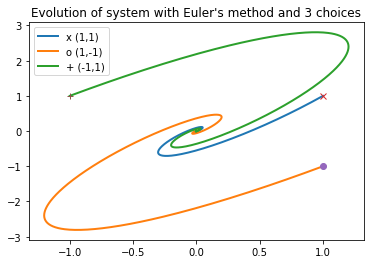

In [15]:

def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
        
    z=np.zeros([np.shape(x)[0]])
    
    z[0]= -2*x[0]+ x[1]
    z[1]= -3*x[0]+ x[1]
    
    return z


Num_met=Numerical_methods2(f)           ## Object definition


dt=0.01                           ## Value of dt
N_iter=int(1000/dt)               ## Number of iteration. 

X_euler=np.zeros([2,N_iter])

x_start=[1,1]                    ## First initial condition
Num_met.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler1,ts=Num_met.Euler(dt,N_iter) 


x_start=[1,-1]                     ## Second initial condition
Num_met.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler2,ts=Num_met.Euler(dt,N_iter) 


x_start=[-1,1]                   ## Third initial condition
Num_met.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler3,ts=Num_met.Euler(dt,N_iter) 



## Plot of the three solutions
fig, ax = plt.subplots(figsize=(6, 4))

plt.plot(X_euler1[0,:],X_euler1[1,:],lw=2, label="x (1,1)")
plt.plot(X_euler2[0,:],X_euler2[1,:],lw=2, label="o (1,-1)")
plt.plot(X_euler3[0,:],X_euler3[1,:],lw=2, label="+ (-1,1)")
plt.plot(1,1, 'x')
plt.plot(1,-1, 'o')
plt.plot(-1,1, '+')
plt.title("Evolution of system with Euler's method and 3 choices")
plt.legend();

In [1]:
a=[1,2,3]
def abc(kk):
    for i in kk:
        yield i*i
abc(a)

<generator object abc at 0x000002539987DB30>

In [3]:
lll=abc(a)

TypeError: 'generator' object is not subscriptable